In [1]:
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
#cancer data import
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['label'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.shape

(569, 31)

In [4]:
#dispersion
scaler = StandardScaler()
scaler.fit(df.iloc[:,:-1])
X_scaled = scaler.transform(df.iloc[:,:-1])
dfs = pd.DataFrame(data=X_scaled,columns=cancer.feature_names)
dfs['label']=df['label']
dfs.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [5]:
dfs.shape

(569, 31)

In [6]:
#all PCA
pca = PCA(n_components=30)
pca.fit(dfs.iloc[:,:-1])
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.iloc[:,:-1].columns))])

,0
PC1,0.442720
PC2,0.189712
PC3,0.093932
PC4,0.066021
PC5,0.054958
PC6,0.040245
PC7,0.022507
PC8,0.015887
PC9,0.013896
PC10,0.011690


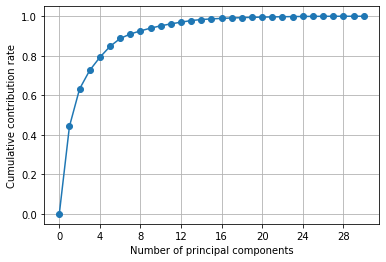

In [7]:
# 累積寄与率をplot
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [8]:
#Top 5
pca = PCA(n_components=5)
pca.fit(dfs.iloc[:,:-1])
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(5)])

,0
PC1,0.442720
PC2,0.189712
PC3,0.093932
PC4,0.066021
PC5,0.054958


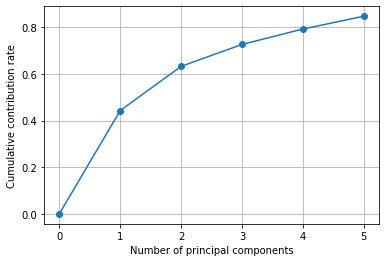

In [9]:
# 累積寄与率をplot
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [12]:
#PCA
pca = PCA(n_components=5) #Compressed from 14 dimensions to 2 dimensions
X = pca.fit_transform(dfs.iloc[:,:-1].values) #Dimensional compression of wine data with PCA
pca = pd.DataFrame(X)
pca = pca.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5'})
pca['label'] = dfs['label']
pca.head()

,PC1,PC2,PC3,PC4,PC5,label
0,9.192837,1.948583,-1.123167,3.633729,-1.195112,0
1,2.387802,-3.768172,-0.529291,1.118266,0.621777,0
2,5.733896,-1.075174,-0.551749,0.912082,-0.177087,0
3,7.122953,10.275589,-3.232789,0.152548,-2.960878,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,0


Text(0.5, 1.0, 'scatter')

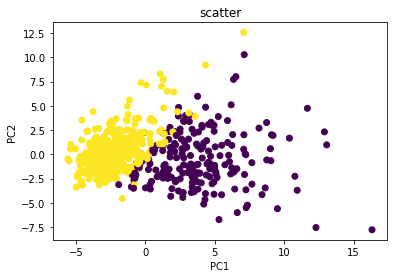

In [13]:
plt.scatter(pca['PC1'],pca['PC2'],c=dfs['label'],marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('scatter')

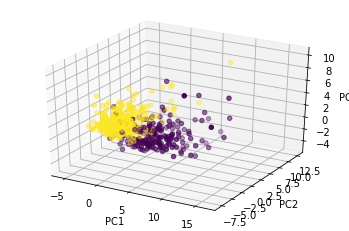

In [14]:
#3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x = pca['PC1']
y = pca['PC2']
z = pca['PC3']

ax.scatter(x,y,z,c=pca['label'],marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()